# Problem 2

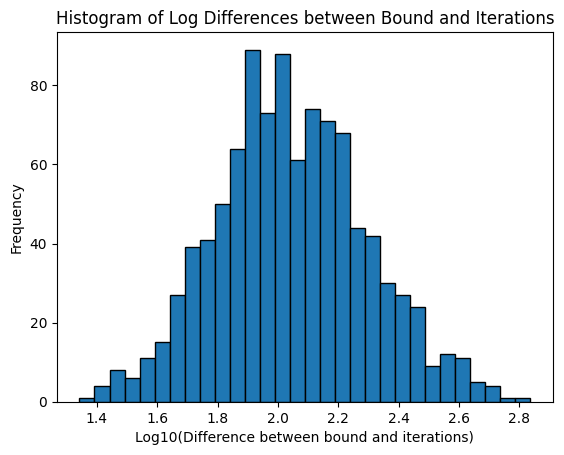

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_weight_vector(dim=10):
    w_star = np.random.uniform(0, 1, size=dim)
    w_star[0] = 0  # Set the first dimension to 0 for the threshold
    return w_star

def generate_training_set(w_star, num_examples=100):
    dim = len(w_star)
    X = np.random.uniform(-1, 1, size=(num_examples, dim))
    y = np.sign(np.dot(X, w_star))
    return X, y

def perceptron_learning(X, y, max_iterations=1000):
    num_examples, dim = X.shape
    w = np.zeros(dim)
    iterations = 0

    while iterations < max_iterations:
        misclassified = np.where(y * np.dot(X, w) <= 0)[0]

        if len(misclassified) == 0:
            break

        random_misclassified = np.random.choice(misclassified)
        w += y[random_misclassified] * X[random_misclassified]
        iterations += 1

    return iterations

def run_experiment(num_trials=1000):
    iteration_counts = []

    for _ in range(num_trials):
        w_star = generate_weight_vector()
        X, y = generate_training_set(w_star)
        iterations = perceptron_learning(X, y)
        iteration_counts.append(iterations)

    return iteration_counts

def plot_histogram(iteration_counts):
    plt.hist(np.log10(iteration_counts), bins=30, edgecolor='black')
    plt.xlabel('Log10(Difference between bound and iterations)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Log Differences between Bound and Iterations')
    plt.show()

if __name__ == "__main__":
    iteration_counts = run_experiment()
    plot_histogram(iteration_counts)


# Problem 4

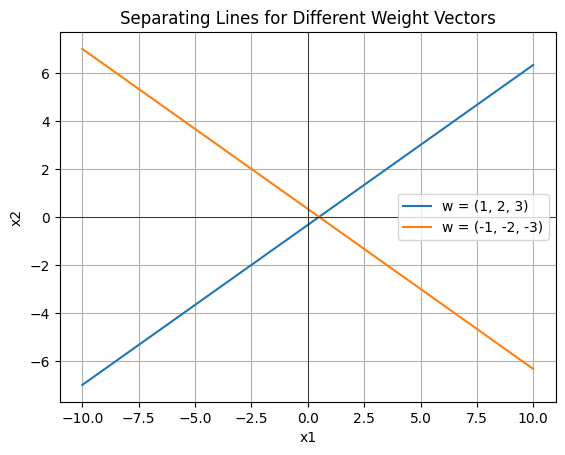

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Weight vector w = (1, 2, 3)
w1 = 2/3
w2 = -1/3
x1_vals = np.linspace(-10, 10, 100)
x2_vals = w1*x1_vals + w2

plt.plot(x1_vals, x2_vals, label='w = (1, 2, 3)')

# Weight vector w = (-1, -2, -3)
w1 = -2/3
w2 = 1/3
x2_vals = w1*x1_vals + w2

plt.plot(x1_vals, x2_vals, label='w = (-1, -2, -3)')

plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.title('Separating Lines for Different Weight Vectors')
plt.show()